# un modello matematico del testo in linguaggio naturale

Software scalabile = funziona independentemente dal numero di client che usano i suoi servizi.
Questo modello ci aiuterà a capire come funzionano i **LLM (Large Language Model)**.

* I LLM sono le reti neurali alla base dell'IA generativa.

* **LWM** = Large World Model.

* I LLM generano in testo mediante un processo detto **autoregressione**: quando forniamo un prompt all'IA generativa, il LLM genera la risposta token per **token**: 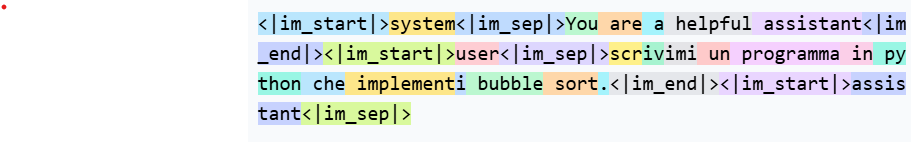

* I token in media sono 0.75 parole e creano 1 token alla volta. Ad ogni istante della generazione della risposta, LLM prende in input tutti i token del prompt e tutti i nuovi token che ha generato fino a quel momento.


https://tiktokenizer.vercel.app/

In [33]:
# importazioni librerie
import random

In [34]:
# caricamento input
file=open("sei_personaggi_in_cerca_dautore_Luigi_Pirandello.txt","r",encoding="utf-8")
text=file.read()

In [35]:
# pre-processing
text=text.replace("\n"," ").lower()
for i in range(2):
    text=text.replace("  "," ")

In [42]:
# i nostri token sono sempre un carattere
# bigramma=sequenza di 2 lettere
l_context=6
markov_dict={}
for i, _ in enumerate(text[:-l_context]):
    ngram=text[i:i+l_context]
    if ngram in markov_dict:
        markov_dict[ngram].append(text[i+l_context])
    else:
        markov_dict[ngram]=[text[i+l_context]]

Il dizionario `markov_dict` è un modello matematico del loinguaggio naturale che ora usiamo per costruire un autoregressore **Markoviano**.

In [88]:
ngram_0="coccod"
l_phrase=100
phrase=ngram_0
if len(ngram_0)!=l_context:
    print("Errore!")
else:
    for _ in range(l_phrase):
        if ngram_0 in markov_dict:
            next_char=random.choice(markov_dict[ngram_0])
            phrase=phrase+next_char
            ngram_0=phrase[-l_context:]
        else:
            break

print(phrase)

coccodrillo! perché sia morto! finiamola! il padre. no--che me ne andati, santo dalla madre si acchiappare


In [1]:
import random

In [2]:
class MarkovTextGenerator:
    
    def __init__(self, l_context):
        self.l_context=l_context
        self.markov_dict={}

    def train(self, text):
        text=text.replace("\n", " ").lower()
        for _ in range(2):
            text=text.replace("  ", " ")

        for i in range(len(text) - self.l_context):
            ngram=text[i:i+self.l_context]
            next_char=text[i+self.l_context]
            if ngram in self.markov_dict:
                self.markov_dict[ngram].append(text[i+self.l_context])
            else:
                self.markov_dict[ngram]=[text[i+self.l_context]]

    def generate(self, inizio, length=100):
        phrase=inizio
        ngram=inizio

        for _ in range(length):
            if ngram in self.markov_dict:
                next_char=random.choice(self.markov_dict[ngram])
                phrase+=next_char
                ngram=phrase[-self.l_context:]
            else:
                break

        return phrase

In [3]:
if __name__ == "__main__":
    file=open("sei_personaggi_in_cerca_dautore_Luigi_Pirandello.txt","r",encoding="utf-8")
    text=file.read()

    generator=MarkovTextGenerator(6)
    generator.train(text)

    inizio="coccod"
    testoN=generator.generate(inizio, length=100)
    print(testoN)

coccodrillo! il cappellisce ai nostro? il direttore-capocomico. ma se debbo dire? il segretario di lei. il
